# Xpand IT DS Challenge

This notebook contains the template you should use to present your code, results and conclusions. You should keep the main structure intact to make it easier to evaluate and compare in the end.

## Dataset
You can find the dataset in the data folder of the repository. The folder contains two files:
* dow_jones_index.data - dataset data
* dow_jones_index.names - dataset information and details

## Business Analysis
Here you should conduct a brief analysis of what is Dow Jones Index. You can enumerate the main topics to take into account based on the dataset provided as well as your understandings of the variables.


-----
*Add here your business analysis conclusions (max. 200 words)*

-----

The Dow Jones [Industrial] Index (DJIA) is a stock market index founded in February 16, 1885, as DJA, and renamed to DJIA in May 26, 1896. Nowadays, the index comprises 30 blue chip companies listed on the New York stock exchange and the Nasdaq. These companies operate on industries ranging from information technology or financial services to retailing or food industry, to name a few. The largest index weight is held by UnitedHealth Group, at 8.81%, followed closely by Microsoft and Goldman Sachs at 6.83% and 6.54%, respectively. It also includes other internationally recognised companies, such as Apple, McDonald's and Visa, for instance.

Unlike other common indexes, the Dow Jones Index is price-weighted, as opposed to being weighted by market capitalisation. As such, stocks with higher share prices have a greater influence. The DJIA is calculated by dividing the sum of the prices of all component stocks, $\sum p$, by the Dow Divisor, $d$. As of February 2024, the Dow Divisor was set at 0.15265312230608.

The Dow Jones Index is reevaluated on a regular basis, replacing companies that no longer meet the eligibility criteria.



## Data Understanding
During the data understanding phase, you should focus on understanding what each variable represents, compute statistics and visualizations. Some questions that may guide your work follow:
* Feature engineering: should new features be created from the existing ones?
* What will be your features and your label?
* Is the dataset ready for the prediction task? (ex: missing values)
* How will the data be split into train and test sets?

-----

#### Imports

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Load data

In [97]:
with open('data/dow_jones_index.names') as f:
    print(f.read())

This dataset was first used in:
Brown, M. S., Pelosi, M. & Dirska, H. (2013). Dynamic-radius Species-conserving Genetic Algorithm for 
the Financial Forecasting of Dow Jones Index Stocks. Machine Learning and Data Mining in Pattern 
Recognition, 7988, 27-41.

Number of Instances
There are 750 data records.  360 are from the first quarter of the year (Jan to Mar)
390 are from the second quarter of the year (Apr to Jun).

Number of Attributes
There are 16 attributes. 

For each Attribute
	quarter:  the yearly quarter (1=Jan-Mar; 2=Apr-Jun)
	stock: the stock symbol (see below)
	date: the last business day of the work (this is typically a Friday)
	open: the price of the stock at the beginning of the week
	high: the highest price of the stock during the week
	low: the lowest price of the stock during the week
	close: the price of the stock at the end of the week
	volume: the number of shares of stock that traded hands in the week
	percent_change_price: the percentage change in price through

In [241]:
data = pd.read_csv('data/dow_jones_index.data')
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


The dataset contains 16 attributes, well described in the dow_jones_index.names file. Already missing values can be noted in the columns percent_change_next_weeks_price and previous weeks_volume. This likely corresponds to the first day recorded. Every date corresponds to a Friday. The dataset is not ready for the prediction task, as it contains missing values and some columns ar not in the correct data type (price columns, for instance). The percent_change_next_weeks_price column is the most valuable for the prediction task, as it represents the percentage change in price from the current week to the next week.

In [239]:
len(data)

720

The dataset only contains 720 rows, which is little, especially considering each row corresponds to one of 30 stocks every friday. This means that 720/30=24 data points are available for each stock.

#### Check data types

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

The date column is of type object. It should be converted to datetime for easier handling. The price columns are also of type object and contain dollar signs. These will be removed and converted to float.

In [243]:
data['date'] = pd.to_datetime(data['date'])
price_columns = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']
data[price_columns] = data[price_columns].replace('[\$,]', '', regex=True).astype(float)

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

#### Basic statistics

In [245]:
data.describe()

,quarter,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,750,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.520000,2011-03-31 23:02:24,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,5.593627,1.173876e+08,53.702440,53.889080,0.238468,52.525333,0.691826
min,1.000000,2011-01-07 00:00:00,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,1.000000,2011-02-18 00:00:00,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,30.315000,30.462500,-1.222068,24.000000,0.534549
50%,2.000000,2011-04-01 00:00:00,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,0.512586,5.294556e+07,46.015000,46.125000,0.101193,47.000000,0.681067
75%,2.000000,2011-05-13 00:00:00,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,21.800622,1.333230e+08,72.715000,72.915000,1.845562,69.000000,0.854291
max,2.000000,2011-06-24 00:00:00,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,336.000000,1.564210
std,0.499933,NaN,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,40.543478,1.592322e+08,32.778111,33.016677,2.679538,46.335098,0.305482


The percent_change_next_weeks_price column has a high discrepancy between minimum and maximum values, which suggests the presence of outliers. Given the nature of the stock market, this is expected. It would not be beneficial to remove these outliers, as they are likely to be valuable data points for the prediction task, especially given the small dataset.

Now, to check for missing values:

In [246]:
data.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

Considering the importance of the columns where missing values are detected, the best policy will be to drop rows with missing values.

In [247]:
data = data.dropna()

find all date unique values

In [11]:

data['date'].unique()

<DatetimeArray>
['2011-01-14 00:00:00', '2011-01-21 00:00:00', '2011-01-28 00:00:00',
 '2011-02-04 00:00:00', '2011-02-11 00:00:00', '2011-02-18 00:00:00',
 '2011-02-25 00:00:00', '2011-03-04 00:00:00', '2011-03-11 00:00:00',
 '2011-03-18 00:00:00', '2011-03-25 00:00:00', '2011-04-01 00:00:00',
 '2011-04-08 00:00:00', '2011-04-15 00:00:00', '2011-04-21 00:00:00',
 '2011-04-29 00:00:00', '2011-05-06 00:00:00', '2011-05-13 00:00:00',
 '2011-05-20 00:00:00', '2011-05-27 00:00:00', '2011-06-03 00:00:00',
 '2011-06-10 00:00:00', '2011-06-17 00:00:00', '2011-06-24 00:00:00']
Length: 24, dtype: datetime64[ns]

For each day, find the maximum value in percent_change_price, and the corresponding stock. Assign 1 to the stock with the maximum value, and 0 to the others in a new column called 'best_stock'

In [154]:
data['best_stock'] = data.groupby('date')['percent_change_next_weeks_price'].transform('max') == data['percent_change_next_weeks_price']

In [194]:
#rank stocks by percent_change_next_weeks_price
data['rank'] = data.groupby('date')['percent_change_next_weeks_price'].rank(ascending=False)

In [190]:
#sort data by date
data = data.sort_values('date')
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,rank
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,29.0
61,1,CSCO,2011-01-14,20.94,21.23,20.70,21.21,154708263,1.289400,-49.032988,303545878.0,21.22,20.72,-2.356270,74,0.282885,27.0
73,1,CVX,2011-01-14,90.95,92.85,90.12,92.83,28260512,2.067070,-20.518947,35556288.0,92.94,93.78,0.903809,31,0.775611,11.0
85,1,DD,2011-01-14,48.30,49.80,47.20,49.80,34546875,3.105590,24.903787,27658789.0,49.53,48.35,-2.382390,28,0.823293,28.0
97,1,DIS,2011-01-14,39.01,39.81,38.92,39.29,31943413,0.717765,-56.192464,72917621.0,39.07,39.74,1.714870,329,1.018070,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2,MSFT,2011-06-24,24.17,24.86,24.16,24.30,309206180,0.537857,10.261383,280430166.0,24.23,26.02,7.387540,53,0.658436,3.0
502,2,HD,2011-06-24,34.29,35.69,34.28,35.08,65416820,2.303880,-14.260438,76297124.0,35.03,36.73,4.852980,67,0.712657,21.0
424,2,CAT,2011-06-24,96.49,102.50,96.05,100.01,43722864,3.648050,0.267013,43606429.0,99.96,108.62,8.663470,24,0.459954,1.0
593,2,KO,2011-06-24,65.37,66.82,64.43,64.93,49806614,-0.673092,15.306642,43194922.0,64.85,68.09,4.996140,81,0.723856,20.0


evolution of percent_change_price for each stock

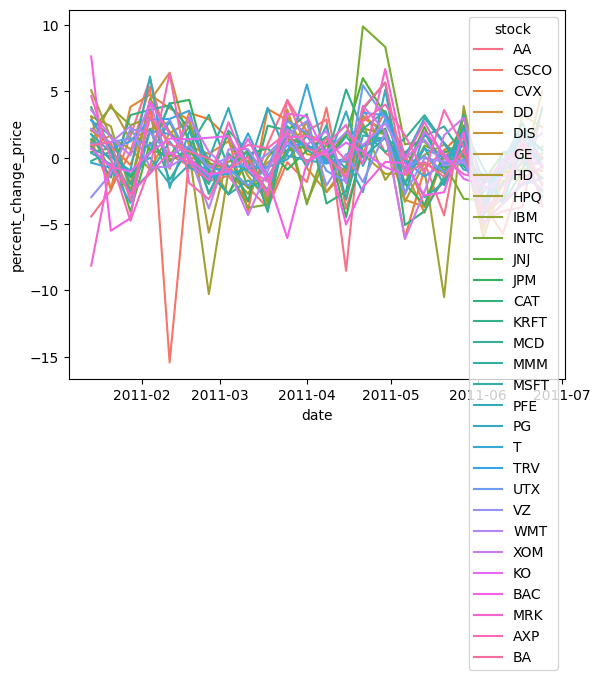

In [156]:

sns.lineplot(data=data, x='date', y='percent_change_price', hue='stock')
plt.show()


correlation between all columns except date and stock

<Axes: >

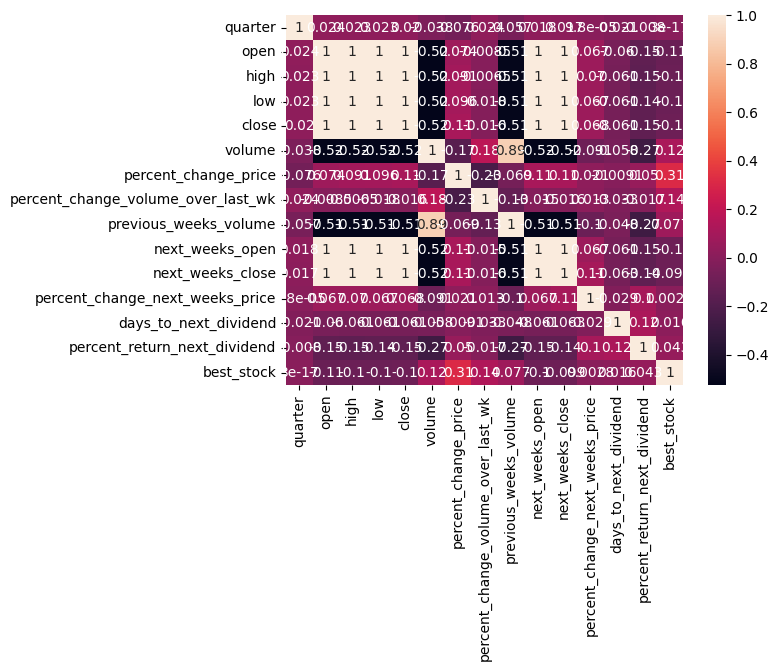

In [17]:


corr = data.drop(columns=['date', 'stock']).corr()
sns.heatmap(corr, annot=True)

In [ ]:
data[data['date'] == '2011-01-28']

In [191]:
#take day, and month from date
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

-----
*Add here your data understanding findings and conclusions (max. 200 words)*

-----

## Modelling
In this phase, your main goal is to develop and describe your approach to the solution of the problem. Some guidelines to help you:
* What metrics will you use to evaluate your solutions?
* What are some algorithms that can lead to good results? And why?
* Describe in detail your thought process during the development of your solution.
* Present your results.


-----


In [158]:
#unique dates
data['date'].unique()

<DatetimeArray>
['2011-01-14 00:00:00', '2011-01-21 00:00:00', '2011-01-28 00:00:00',
 '2011-02-04 00:00:00', '2011-02-11 00:00:00', '2011-02-18 00:00:00',
 '2011-02-25 00:00:00', '2011-03-04 00:00:00', '2011-03-11 00:00:00',
 '2011-03-18 00:00:00', '2011-03-25 00:00:00', '2011-04-01 00:00:00',
 '2011-04-08 00:00:00', '2011-04-15 00:00:00', '2011-04-21 00:00:00',
 '2011-04-29 00:00:00', '2011-05-06 00:00:00', '2011-05-13 00:00:00',
 '2011-05-20 00:00:00', '2011-05-27 00:00:00', '2011-06-03 00:00:00',
 '2011-06-10 00:00:00', '2011-06-17 00:00:00', '2011-06-24 00:00:00']
Length: 24, dtype: datetime64[ns]

In [207]:
#for validation, split data into training and validation, where validation corresponds to the last 7 dates
train = data[data['date'] < '2011-05-13']
test = data[data['date'] >= '2011-05-13']

In [208]:
from sklearn.model_selection import train_test_split
features = ['day', 'month', 'percent_change_price', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']
label = 'rank'
X_train = train[features]
y_train = train[label]
X_test = test[features]
y_test = test[label]

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(verbose=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


np.float64(77.23436761904762)

In [211]:
y_pred

array([12.62, 15.31, 13.51, 15.99, 24.75, 10.87, 20.97, 20.32, 20.77,
       17.15, 14.4 , 14.54, 14.63, 16.82, 12.81, 16.94, 13.23, 15.99,
       12.97, 14.63, 13.56, 15.94, 16.87, 13.3 , 16.56, 14.03, 15.64,
       16.18, 12.6 , 15.92, 15.99, 16.8 , 15.6 , 15.74, 10.8 , 13.17,
       17.37, 16.1 , 22.17, 14.4 , 13.67, 11.35, 16.45, 16.72, 15.76,
       13.68, 15.81, 12.12, 15.39, 12.85, 17.93, 11.87, 14.01, 15.93,
       11.64, 13.75, 12.77, 21.08, 11.28, 15.41, 15.77, 13.12, 15.14,
       16.7 , 18.59, 12.35, 11.75, 15.48, 11.81, 14.38, 16.44, 16.08,
       10.49, 17.83, 13.93, 14.56, 15.39, 15.8 , 12.81, 11.35, 15.2 ,
       13.88, 15.46, 11.38, 13.47, 16.3 , 16.49, 16.  , 17.25, 16.23,
       14.68, 14.9 , 16.53, 12.25, 12.85, 17.16, 13.34, 12.09, 14.81,
       15.01, 14.09, 13.99, 17.58, 14.66, 16.25, 15.07, 17.64, 10.12,
       15.21, 13.44, 19.9 , 15.85, 14.52, 15.09, 18.85, 19.66, 13.91,
       20.03, 15.18, 16.46, 13.63, 14.47, 14.89, 15.49, 13.38, 17.18,
       12.59, 15.98,

In [215]:
#for every 30 element in y_pred, rank the elements and assign the rank to the element out of the 30 in each iteration
y_pred = pd.Series(y_pred)
for i in range(0, len(y_pred), 30):
    y_pred[i:i+30] = y_pred[i:i+30].rank(method='first')


In [216]:
y_pred

0       4.0
1      22.0
2      11.0
3      17.0
4      30.0
       ... 
205    25.0
206    26.0
207     1.0
208    22.0
209     8.0
Length: 210, dtype: float64

In [219]:
y_test.reset_index(drop=True, inplace=True)
y_test

0      17.0
1       3.0
2      13.0
3       9.0
4      28.0
       ... 
205     3.0
206    21.0
207     1.0
208    20.0
209     6.0
Name: rank, Length: 210, dtype: float64

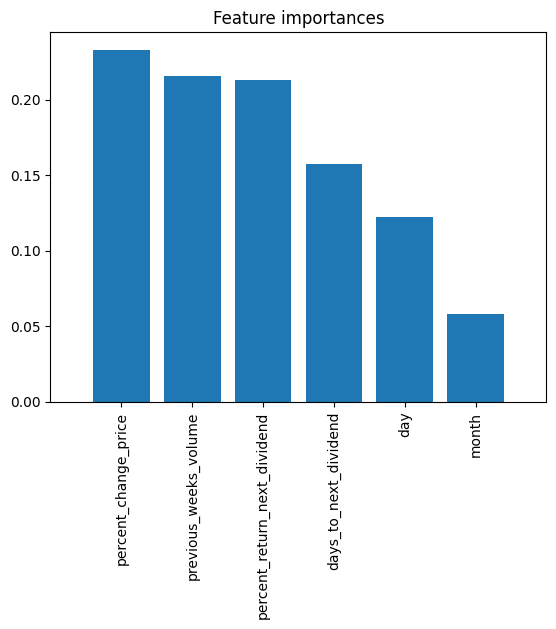

In [200]:
#feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")

plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [220]:
#now try with xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(90.64396030190471)

In [221]:
#rank the predictions
y_pred = pd.Series(y_pred)
for i in range(0, len(y_pred), 30):
    y_pred[i:i+30] = y_pred[i:i+30].rank(method='first')


In [227]:
#get index of y_test where the rank is 1
y_test[y_test == 1].index

Index([9, 50, 70, 105, 129, 162, 207], dtype='int64')

In [228]:
y_pred[y_test[y_test == 1].index]

9      20.0
50     26.0
70     16.0
105    22.0
129     7.0
162    22.0
207    12.0
dtype: float32

In [234]:
#now try another model other than gradient boosting or random forest, one appropriate for ranking
from lightgbm import LGBMRanker
model = LGBMRanker()
model.fit(X_train, y_train, group=[30]*17)
y_pred = model.predict(X_test, group=[30]*7)
mean_squared_error(y_test, y_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 510, number of used features: 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

np.float64(399.80169650588164)

In [236]:
#rank the predictions
y_pred = pd.Series(y_pred)
for i in range(0, len(y_pred), 30):
    y_pred[i:i+30] = y_pred[i:i+30].rank(method='first')

In [237]:
y_pred

0       1.0
1      17.0
2      21.0
3      16.0
4      30.0
       ... 
205    26.0
206    15.0
207    20.0
208    23.0
209     8.0
Length: 210, dtype: float64

In [238]:
y_test

0      17.0
1       3.0
2      13.0
3       9.0
4      28.0
       ... 
205     3.0
206    21.0
207     1.0
208    20.0
209     6.0
Name: rank, Length: 210, dtype: float64

In [167]:
#use smote to balance the classes in the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [168]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.95      0.95        99
        True       0.95      0.96      0.95        99

    accuracy                           0.95       198
   macro avg       0.95      0.95      0.95       198
weighted avg       0.95      0.95      0.95       198



In [174]:
accuracy_score(y_test, y_pred)

0.9545454545454546

In [175]:
#now predict on the validation set
X_val = val[features]
y_val = val[label]
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       203
        True       0.00      0.00      0.00         7

    accuracy                           0.97       210
   macro avg       0.48      0.50      0.49       210
weighted avg       0.93      0.97      0.95       210



C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

In [181]:
#now try the same but with regression for rank
features = ['day', 'month', 'percent_change_price', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']
label = 'rank'
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(67.23215486111111)

In [184]:
y_pred

array([14.2 ,  8.18, 22.54, 12.47, 18.67, 18.77, 19.36, 13.24,  8.97,
       14.32, 13.82, 21.41, 19.13, 16.16, 14.12, 16.75, 15.73, 17.54,
       23.27, 14.42, 16.38, 13.08, 18.77, 13.57, 17.93, 21.26, 12.76,
       16.86, 18.43, 15.24, 17.99, 16.87, 13.03, 10.46, 14.4 , 10.84,
       17.79, 18.4 , 19.13, 13.74, 12.87, 11.53, 15.49, 11.47, 12.32,
       18.16, 13.93, 18.41, 22.49, 15.52, 13.4 , 18.61, 17.57, 13.37,
       17.99, 14.8 , 23.02, 15.06, 15.93, 19.67, 15.22, 17.43, 13.87,
       20.74, 16.52, 16.96, 21.4 , 16.58, 13.56, 18.1 , 18.31, 17.17,
       16.79, 14.32, 17.38, 14.65, 15.34, 14.89, 14.03, 14.48, 15.31,
       14.94, 16.84, 15.77, 15.42, 14.05, 14.89, 11.64, 15.16, 15.74,
       15.13, 19.12, 13.49, 14.78, 16.93, 15.24, 17.25, 14.61, 22.62,
       21.96, 10.48, 13.94, 22.92, 10.85, 16.72, 11.16, 12.83, 16.92,
       13.18, 13.76,  9.6 , 16.2 , 11.91, 16.96, 23.93, 15.56, 12.51,
       18.06, 11.98, 12.32, 12.81, 17.71, 15.13, 15.64, 15.47, 19.36,
       16.35, 13.06,

In [183]:
y_test

516    21.0
154     6.0
2       7.0
19     13.0
702    14.0
       ... 
6      23.0
342    28.0
43     23.0
233    11.0
456    27.0
Name: rank, Length: 144, dtype: float64

In [18]:
#add here your modelling code
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [19]:
data.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend', 'best_stock'],
      dtype='object')

In [143]:
#one hot encode rank
data = pd.get_dummies(data, columns=['rank'])

In [145]:
y

1      29.0
61     27.0
73     11.0
85     28.0
97      4.0
       ... 
645     3.0
502    21.0
424     1.0
593    20.0
749     6.0
Name: rank, Length: 720, dtype: float64

In [147]:
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,...,rank_21.0,rank_22.0,rank_23.0,rank_24.0,rank_25.0,rank_26.0,rank_27.0,rank_28.0,rank_29.0,rank_30.0
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,...,False,False,False,False,False,False,False,False,True,False
61,1,CSCO,2011-01-14,20.94,21.23,20.70,21.21,154708263,1.289400,-49.032988,...,False,False,False,False,False,False,True,False,False,False
73,1,CVX,2011-01-14,90.95,92.85,90.12,92.83,28260512,2.067070,-20.518947,...,False,False,False,False,False,False,False,False,False,False
85,1,DD,2011-01-14,48.30,49.80,47.20,49.80,34546875,3.105590,24.903787,...,False,False,False,False,False,False,False,True,False,False
97,1,DIS,2011-01-14,39.01,39.81,38.92,39.29,31943413,0.717765,-56.192464,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2,MSFT,2011-06-24,24.17,24.86,24.16,24.30,309206180,0.537857,10.261383,...,False,False,False,False,False,False,False,False,False,False
502,2,HD,2011-06-24,34.29,35.69,34.28,35.08,65416820,2.303880,-14.260438,...,True,False,False,False,False,False,False,False,False,False
424,2,CAT,2011-06-24,96.49,102.50,96.05,100.01,43722864,3.648050,0.267013,...,False,False,False,False,False,False,False,False,False,False
593,2,KO,2011-06-24,65.37,66.82,64.43,64.93,49806614,-0.673092,15.306642,...,False,False,False,False,False,False,False,False,False,False


In [149]:
#ml algorithm to rank stocks, based on one hot encoded rank
features = ['day', 'month', 'percent_change_price', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']
labels = [col for col in data.columns if 'rank' in col]

X = data[features]
y = data[labels]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         4
          17       0.00    

C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no tru

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
print(classification_report(y_test, y_pred))

In [142]:
#ml algorithm to rank stocks
features = ['day', 'month', 'percent_change_price', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']
label = 'rank'
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00         4
         9.0       0.00      0.00      0.00         5
        10.0       0.00      0.00      0.00         4
        11.0       0.40      0.29      0.33         7
        12.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00         8
        15.0       0.00      0.00      0.00         4
        16.0       0.00      0.00      0.00         3
        17.0       0.00      0.00      0.00         4
        18.0       0.00    

C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples

In [123]:
features = ['day', 'month', 'percent_change_price', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']
label = 'best_stock'
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
#use smote to balance the classes in the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_train = X_resampled
y_train = y_resampled

In [109]:
#use smote to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = data.drop(columns=['date', 'stock', 'best_stock'])
y = data['best_stock']
X_resampled, y_resampled = smote.fit_resample(X, y)

data = pd.concat([X_resampled, y_resampled], axis=1)

In [130]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97       136
        True       0.00      0.00      0.00         8

    accuracy                           0.94       144
   macro avg       0.47      0.50      0.49       144
weighted avg       0.89      0.94      0.92       144



C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jgalv\OneDrive - Universidade de Lisboa\XpandIT\DSU-Recruitment-Challenges\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

In [112]:
accuracy_score(y_test, y_pred)

0.9283154121863799

In [ ]:
#check feature importance

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [114]:
#check predicted and real values by hand
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred)
pd.concat([y_test, y_pred], axis=1)

,best_stock,0
0,True,True
1,False,False
2,True,True
3,True,True
4,False,False
...,...,...
274,False,False
275,False,False
276,True,False
277,True,True


In [ ]:
#instead try ranking the stocks by percent_change_next_weeks_price


In [ ]:
#try regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [50]:
model = RandomForestRegressor()
label = 'percent_change_next_weeks_price'
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(6.97786706162021)

In [51]:
#print real and predicted values

print(y_test, y_pred)

370   -3.727930
317   -0.070530
59     3.268210
217    0.482251
483   -1.158690
         ...   
179    0.864700
181    0.599733
218   -1.306400
145    3.791220
531    9.882230
Name: percent_change_next_weeks_price, Length: 144, dtype: float64 [ 6.96646278e-01  3.80190080e-01  4.24034134e-01  9.66110004e-01
 -3.17175010e-02  6.30755418e-01 -6.96468424e-01  2.00690517e-01
 -1.34428650e-02  2.00961613e+00  2.84058907e-01  6.35468400e-02
 -2.57887432e+00  3.26244890e-01 -9.19161110e-02  3.00461067e-01
  1.09896723e+00 -4.93677299e-01 -2.72475740e-02  1.85589715e+00
 -5.62522580e-01  8.07876185e-01 -3.24420758e+00  5.50372991e-01
 -1.13577208e+00 -5.52495160e-01 -8.11513974e-01  1.80707208e+00
  1.15500738e+00  3.83993690e+00  8.99439793e-01  4.02080000e-04
 -7.80310588e-01 -1.29177732e+00 -2.88172969e-01 -8.85971846e-01
  4.48114837e-01  1.10025607e+00 -6.64849760e-02 -4.97492532e-01
  1.87997920e-01  1.40506641e+00  3.80817956e-01 -1.68494730e-01
 -9.34170513e-01  1.07440972e+00  1.200012

In [55]:
# sort data by date
data = data.sort_values('date')
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,best_stock
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852,False
25,1,BA,2011-01-14,69.42,70.50,68.35,70.07,18834664,0.936330,-48.053942,3.625812e+07,70.86,71.68,1.157210,26,0.599401,False
13,1,AXP,2011-01-14,44.20,46.25,44.01,46.25,25913713,4.638010,-42.544258,4.510204e+07,46.03,46.00,-0.065175,82,0.389189,False
241,1,MRK,2011-01-14,37.26,37.61,34.23,34.23,108158891,-8.132040,48.650587,7.276049e+07,34.07,33.90,-0.498973,56,1.110140,False
37,1,BAC,2011-01-14,14.17,15.25,14.09,15.25,760935694,7.621740,-47.645833,1.453439e+09,15.08,14.25,-5.503980,47,0.065574,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2,WMT,2011-06-24,52.70,53.70,52.35,52.41,75602550,-0.550285,9.574392,6.899655e+07,52.32,53.51,2.274460,47,0.705972,False
619,2,MMM,2011-06-24,91.42,93.92,90.68,90.89,15126028,-0.579742,-2.726170,1.554995e+07,91.08,96.67,6.137460,54,0.605127,False
593,2,KO,2011-06-24,65.37,66.82,64.43,64.93,49806614,-0.673092,15.306642,4.319492e+07,64.85,68.09,4.996140,81,0.723856,False
684,2,T,2011-06-24,30.66,31.33,30.29,30.44,116043866,-0.717547,1.344117,1.145048e+08,30.65,31.68,3.360520,12,1.412610,False


In [58]:
#count unique dates
data['date'].unique()

<DatetimeArray>
['2011-01-14 00:00:00', '2011-01-21 00:00:00', '2011-01-28 00:00:00',
 '2011-02-04 00:00:00', '2011-02-11 00:00:00', '2011-02-18 00:00:00',
 '2011-02-25 00:00:00', '2011-03-04 00:00:00', '2011-03-11 00:00:00',
 '2011-03-18 00:00:00', '2011-03-25 00:00:00', '2011-04-01 00:00:00',
 '2011-04-08 00:00:00', '2011-04-15 00:00:00', '2011-04-21 00:00:00',
 '2011-04-29 00:00:00', '2011-05-06 00:00:00', '2011-05-13 00:00:00',
 '2011-05-20 00:00:00', '2011-05-27 00:00:00', '2011-06-03 00:00:00',
 '2011-06-10 00:00:00', '2011-06-17 00:00:00', '2011-06-24 00:00:00']
Length: 24, dtype: datetime64[ns]

In [59]:
#split data into training and testing, where testing corresponds to the last 7 dates
train = data[data['date'] < '2011-05-13']
test = data[data['date'] >= '2011-05-13']

In [78]:
features = ['percent_change_price', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']
label = 'percent_change_next_weeks_price'
X_train = train[features]
y_train = train[label]

X_test = test[features]
y_test = test[label]

In [61]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(9.236962814222201)

In [65]:
type(y_pred)

numpy.ndarray

In [72]:
#append predicted values to the test dataframe
test.loc[:,'predicted'] = y_pred

In [73]:
test

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,best_stock,predicted
600,2,MCD,2011-05-13,79.46,80.91,79.08,80.74,26573357,1.610870,0.427202,26460318.0,80.44,82.33,2.349580,14,0.755512,False,1.295593
704,2,UTX,2011-05-13,88.88,90.18,88.35,88.98,17420630,0.112511,-20.079776,21797524.0,88.46,87.50,-1.085240,5,0.539447,False,0.076612
496,2,HD,2011-05-13,36.93,37.43,36.70,37.01,41391929,0.216626,-21.067178,52439439.0,36.69,37.05,0.981194,32,0.675493,False,0.498554
509,2,HPQ,2011-05-13,40.79,41.74,40.22,40.41,63498759,-0.931601,-9.609919,70249698.0,40.20,35.98,-10.497500,31,0.321703,False,0.099009
678,2,T,2011-05-13,31.20,31.79,31.05,31.41,92523592,0.673077,-40.701479,156030184.0,31.32,31.32,0.000000,54,1.368990,False,0.504166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2,WMT,2011-06-24,52.70,53.70,52.35,52.41,75602550,-0.550285,9.574392,68996550.0,52.32,53.51,2.274460,47,0.705972,False,0.635244
619,2,MMM,2011-06-24,91.42,93.92,90.68,90.89,15126028,-0.579742,-2.726170,15549946.0,91.08,96.67,6.137460,54,0.605127,False,0.531507
593,2,KO,2011-06-24,65.37,66.82,64.43,64.93,49806614,-0.673092,15.306642,43194922.0,64.85,68.09,4.996140,81,0.723856,False,0.481650
684,2,T,2011-06-24,30.66,31.33,30.29,30.44,116043866,-0.717547,1.344117,114504788.0,30.65,31.68,3.360520,12,1.412610,False,1.334374


In [76]:


test.loc[:,'pred_best_stock'] = test.groupby('date')['predicted'].transform('max') == test['predicted']

In [77]:
test

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,best_stock,predicted,pred_best_stock
600,2,MCD,2011-05-13,79.46,80.91,79.08,80.74,26573357,1.610870,0.427202,26460318.0,80.44,82.33,2.349580,14,0.755512,False,1.295593,False
704,2,UTX,2011-05-13,88.88,90.18,88.35,88.98,17420630,0.112511,-20.079776,21797524.0,88.46,87.50,-1.085240,5,0.539447,False,0.076612,False
496,2,HD,2011-05-13,36.93,37.43,36.70,37.01,41391929,0.216626,-21.067178,52439439.0,36.69,37.05,0.981194,32,0.675493,False,0.498554,False
509,2,HPQ,2011-05-13,40.79,41.74,40.22,40.41,63498759,-0.931601,-9.609919,70249698.0,40.20,35.98,-10.497500,31,0.321703,False,0.099009,False
678,2,T,2011-05-13,31.20,31.79,31.05,31.41,92523592,0.673077,-40.701479,156030184.0,31.32,31.32,0.000000,54,1.368990,False,0.504166,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2,WMT,2011-06-24,52.70,53.70,52.35,52.41,75602550,-0.550285,9.574392,68996550.0,52.32,53.51,2.274460,47,0.705972,False,0.635244,False
619,2,MMM,2011-06-24,91.42,93.92,90.68,90.89,15126028,-0.579742,-2.726170,15549946.0,91.08,96.67,6.137460,54,0.605127,False,0.531507,False
593,2,KO,2011-06-24,65.37,66.82,64.43,64.93,49806614,-0.673092,15.306642,43194922.0,64.85,68.09,4.996140,81,0.723856,False,0.481650,False
684,2,T,2011-06-24,30.66,31.33,30.29,30.44,116043866,-0.717547,1.344117,114504788.0,30.65,31.68,3.360520,12,1.412610,False,1.334374,False


-----
*Add here your modelling results and conclusions (max. 200 words)*

-----

## Conclusions
In the conclusions, you should enumerate the results you got after completing the challenge.
* How good do you consider your results? 
* What are some factors that would contribute to get better results?
* What are some advantages and disadvantages of your solution?
* What can be done as future work to improve your results?


-----
*Add here your final conclusions (max. 400 words)*

-----

#### Feedback

-----
*Add here your thoughts and feedback regarding this challenge.*

-----

To submit your solution you should e-mail us this notebook in response to the e-mail you initially received with the challenge.